In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
# plt.rcParams['font.size'] = 14
# plt.rcParams["font.family"] = "Times New Roman"
sns.set_theme(font_scale=1.5, font="Times New Roman", style="whitegrid")
# sns.set_theme()
# sns.set(font="Times New Roman")

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
matplotlib.rcParams['font.size'] = 14

In [3]:
# df = pd.read_csv('csv/acc-5.963.csv')
# df_sample = df.sample(n=1800, random_state=42)
# df_sample
# df_sample.to_csv('csv/acc-5.963-sample.csv', index=False)

In [4]:
csv_files = ['csv/acc-5.963-sample.csv', 'csv/acc-s15.484.csv', 'csv/acc-s24.628.csv', 'csv/acc-s38.348.csv']
angular_sizes = [1e-3, 1.3e-4, 1.1e-4, 5e-5]

In [5]:
b = re.compile(r'(\d+.\d+)')

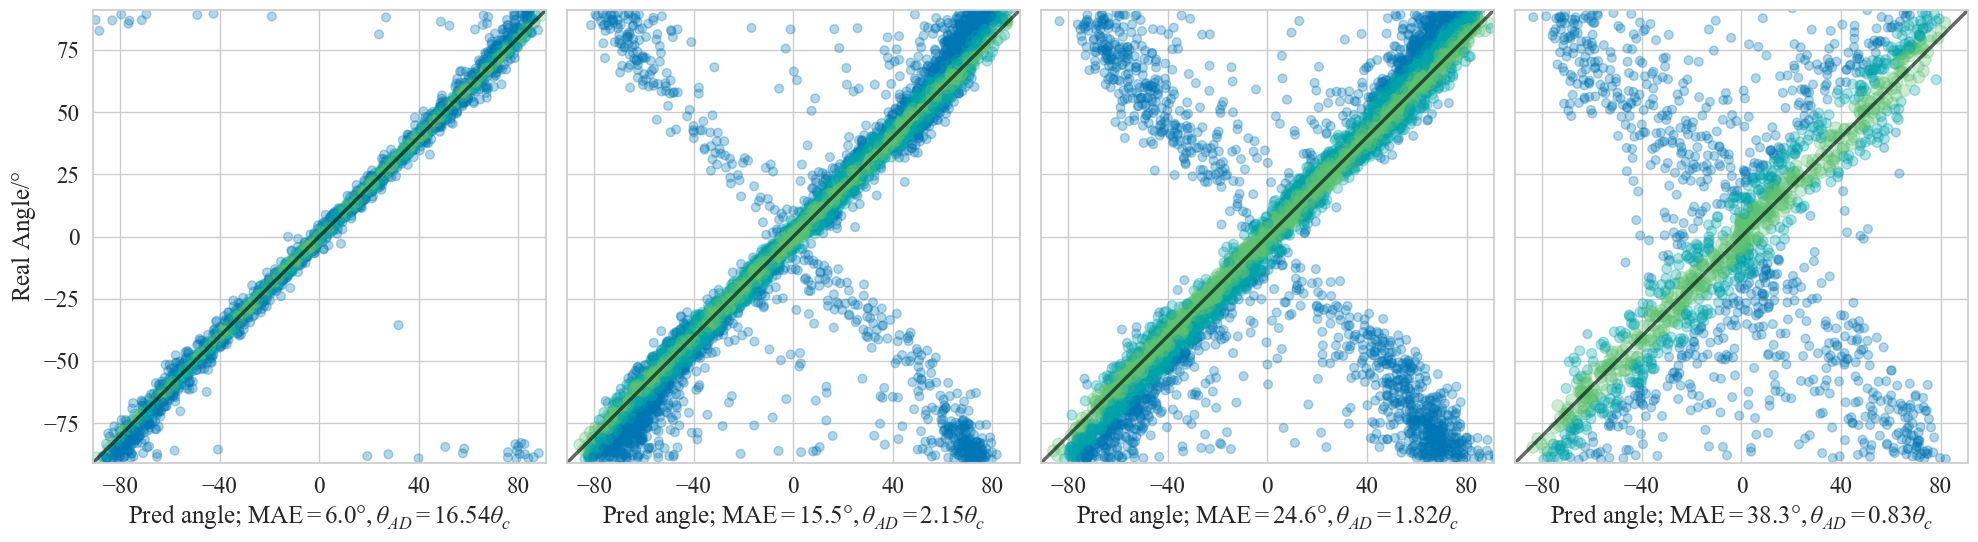

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5.7))
for index, csv_file in enumerate(csv_files):
    ax = axes[index]
    ax.set_aspect('equal')
    mae = float(re.findall(b, csv_file)[0])
    try:
        df = pd.read_csv(csv_file)
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        x = df.Pred
        y = df.Real
    except KeyError as e:
        df = pd.read_csv(csv_file)
        x = df.Pred_inc
        y = df.Real_inc
    df.head()
    col =[]
    sizes = []
    for i in range(0, len(x)):
        distance_to_line = abs(x[i] - y[i])
        if distance_to_line < mae / 5: 
            col.append('#5EC272')
            sizes.append(70)
        elif distance_to_line < mae / 2:
            col.append('#00A3AC')
            sizes.append(50)
        else:
            col.append('#0076B5')
            sizes.append(40)

    # ax.grid(True)
    # Create a line plot of the data points and the linear regression line
    ax.scatter(x, y, alpha=0.3, s=sizes, color=col)
    ax.plot([-91, 91], [-91, 91], linewidth=2.5, color='black', alpha=0.6)
    # Label the axes and title the plot
    ax.set_xlabel(rf"Pred angle; MAE$={mae:.1f}\degree, \theta_{{AD}}={angular_sizes[index]*64/3.87e-3:.2f}\theta_c$")
    if index == 0:
        ax.set_ylabel("Real Angle/$\degree$")
    else:
        ax.set_yticklabels([])
    ax.set_xlim(-91, 91)
    ax.set_ylim(-91, 91)
    ax.set_xticks(np.arange(-80, 81, 40))
    # ax.annotate(f'MAE: {mae}', xy=(0.02, 0.5), xycoords='axes fraction', fontsize=12)
fig.tight_layout()
plt.savefig(f'images/fit4.png', dpi=600)
plt.savefig(f'images/fit4.pdf')
plt.show()

In [7]:
5e-5*64 / 0.00387

0.8268733850129198

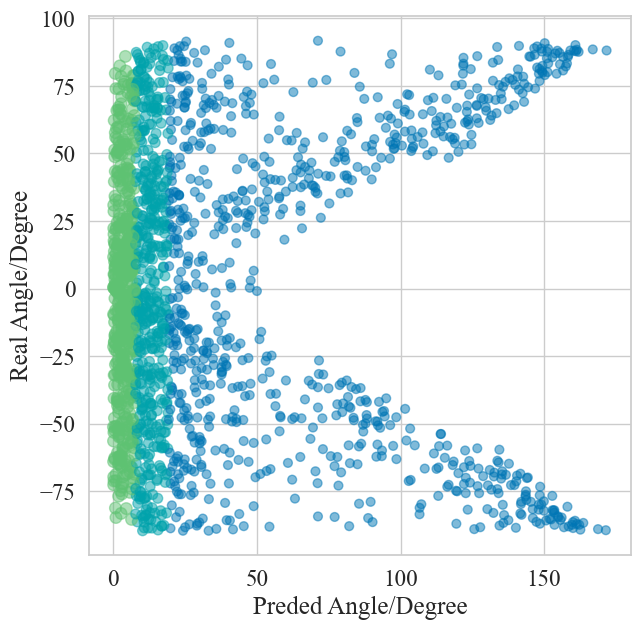

In [8]:
plt.figure(figsize=(7, 7))
# Create a line plot of the data points and the linear regression line
plt.scatter(np.abs(x - y), y, alpha=0.5, s=sizes, color=col)
# plt.plot([-91, 91], [-91, 91], 'red', linewidth=2.5)

# Label the axes and title the plot
plt.xlabel("Preded Angle/Degree")
plt.ylabel("Real Angle/Degree")
# plt.xlim(-91, 91)
# plt.ylim(-91, 91)
# plt.title("Linear Regression")
# plt.savefig('images/fit2.png', dpi=600)

# Show the plot
plt.show()